In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
Traindata_with_Target = pd.read_csv("Traindata_with_Target.csv")
Train_Demographics = pd.read_csv("Train_Demographics.csv")
Train_Vehicle = pd.read_csv("Train_Vehicle.csv")
Train_Policy = pd.read_csv("Train_Policy.csv")
Train_Claim = pd.read_csv("Train_Claim.csv")

In [3]:
a = Traindata_with_Target.merge(Train_Demographics, how='left', on='CustomerID')

In [4]:
b = a.merge(Train_Policy,how='left',on='CustomerID')

In [5]:
c = b.merge(Train_Claim,how='left',on='CustomerID')

In [6]:
train_data = c.merge(Train_Vehicle,how='left',on = 'CustomerID')

In [7]:
Test = pd.read_csv("C:/Users/NEG100/Downloads/final project/final project/TestData/Test.csv")
Test_Demographics = pd.read_csv("C:/Users/NEG100/Downloads/final project/final project/TestData/Test_Demographics.csv")
Test_Vehicle = pd.read_csv("C:/Users/NEG100/Downloads/final project/final project/TestData/Test_Vehicle.csv")
Test_Policy = pd.read_csv("C:/Users/NEG100/Downloads/final project/final project/TestData/Test_Policy.csv")
Test_Claim = pd.read_csv("C:/Users/NEG100/Downloads/final project/final project/TestData/Test_Claim.csv")

In [8]:
e = Test.merge(Test_Demographics, how='left', on='CustomerID')
f = e.merge(Test_Policy, how='left', on='CustomerID')
g = f.merge(Test_Claim, how='left', on='CustomerID')
test_data = g.merge(Test_Vehicle, how='left', on='CustomerID')

In [9]:
train_data.shape

(115344, 40)

In [10]:
test_data.shape

(35648, 39)

In [11]:
pivoted_train = train_data.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').reset_index()
pivoted_test = test_data.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').reset_index()

In [12]:
Train = train_data.merge(pivoted_train,how='left',on='CustomerID')
Test = test_data.merge(pivoted_test,how='left',on='CustomerID')

In [13]:
# Dropping Country Column from Train and Test Data Because it has only one value - India
Train.drop(["Country",'VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)
Test.drop(["Country",'VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)

In [14]:
Train = Train.drop_duplicates()
Test = Test.drop_duplicates()

In [15]:
Train.to_excel("Train_Data.xlsx",sheet_name='Train_Data')
Test.to_excel("Test_data.xlsx",sheet_name='Test_Data')

In [16]:
Train = pd.read_excel('Train_Data.xlsx',
                      na_values=['NA','-1','?','???','MISSINGVAL','MISSINGVALUE','MISSEDDATA','-5'])

In [17]:
Test = pd.read_excel('Test_data.xlsx',
                     na_values=['NA','-1','?','???','MISSINGVAL','MISSINGVALUE','MISSEDDATA','-5'])

In [18]:
train_fraud_yes = Train[Train['ReportedFraud'] == 'Y']
train_fraud_no = Train[Train['ReportedFraud'] == 'N']

In [19]:
train_fraud_yes['TypeOfCollission'] = train_fraud_yes['TypeOfCollission'].fillna(train_fraud_yes['TypeOfCollission'].mode()[0])
train_fraud_no['TypeOfCollission'] = train_fraud_no['TypeOfCollission'].fillna(train_fraud_no['TypeOfCollission'].mode()[0])

In [20]:
Train = train_fraud_yes.append(train_fraud_no, ignore_index=True)

In [21]:
Train['PropertyDamage'] = Train['PropertyDamage'].fillna("NO")
Test['PropertyDamage'] = Test['PropertyDamage'].fillna("NO")
Train['PoliceReport'] = Train['PoliceReport'].fillna("NO")
Test['PoliceReport'] = Test['PoliceReport'].fillna("NO")
Train['InsuredGender'] = Train['InsuredGender'].fillna(Train['InsuredGender'].mode()[0])
Test['InsuredGender'] = Test['InsuredGender'].fillna(Test['InsuredGender'].mode()[0])
Train['PolicyAnnualPremium'] = Train['PolicyAnnualPremium'].fillna(Train['PolicyAnnualPremium'].median())
Test['PolicyAnnualPremium'] = Test['PolicyAnnualPremium'].fillna(Test['PolicyAnnualPremium'].median())
Train['Witnesses'] = Train['Witnesses'].fillna(Train['Witnesses'].mode()[0])
Test['Witnesses'] = Test['Witnesses'].fillna(Test['Witnesses'].mode()[0])
Train['AmountOfTotalClaim'] = Train['AmountOfTotalClaim'].fillna(Train['AmountOfTotalClaim'].median())
Test['AmountOfTotalClaim'] = Test['AmountOfTotalClaim'].fillna(Test['AmountOfTotalClaim'].median())
Train['InsuredGender'] = Train['InsuredGender'].fillna(Train['InsuredGender'].mode()[0])
Test['InsuredGender'] = Test['InsuredGender'].fillna(Test['InsuredGender'].mode()[0])
Test['TypeOfCollission'] = Test['TypeOfCollission'].fillna(Test['TypeOfCollission'].mode()[0])
Test['VehicleMake'] = Test['VehicleMake'].fillna(Test['VehicleMake'].mode()[0])
Train['VehicleMake'] = Train['VehicleMake'].fillna(Train['VehicleMake'].mode()[0])

In [22]:
Train.dropna(inplace=True)

In [23]:
Train.shape

(28836, 42)

In [24]:
Test['TypeOfCollission'] = Test['TypeOfCollission'].fillna(Test['TypeOfCollission'].mode()[0])
Test['TypeOfCollission'] = Test['TypeOfCollission'].fillna(Test['TypeOfCollission'].mode()[0])
Test['PropertyDamage'] = Test['PropertyDamage'].fillna("NO")
Test['PoliceReport'] = Test['PoliceReport'].fillna("NO")

In [25]:
Test.shape

(8912, 41)

In [26]:
Train.drop(["Unnamed: 0"],axis=1,inplace=True)
Test.drop(["Unnamed: 0"],axis=1,inplace=True)

In [27]:
Train_copy = Train.copy()
Test_copy = Test.copy()

In [28]:
dropping_columns = ['InsurancePolicyNumber','DateOfPolicyCoverage','InsuredZipCode','IncidentTime','IncidentAddress',
                    'InsurancePolicyState','IncidentCity','IncidentState','InsuredHobbies','DateOfIncident','AmountOfTotalClaim']

Train.drop(dropping_columns, inplace = True, axis = 1)
Test.drop(dropping_columns,inplace = True, axis =1)

In [29]:
Train.shape,Test.shape

((28836, 30), (8912, 29))

In [30]:
Train.drop(['InsuredAge','CustomerID','VehicleID','VehicleMake','VehicleModel','VehicleYOM'], inplace = True, axis = 1)
Test.drop(['InsuredAge','CustomerID','VehicleID','VehicleMake','VehicleModel','VehicleYOM'], inplace = True, axis = 1)

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

Train['ReportedFraud'] = label_encoder.fit_transform(Train['ReportedFraud'])

In [32]:
# separating the feature and target columns
X = Train.drop('ReportedFraud', axis = 1)
y = Train['ReportedFraud']

In [33]:
numerical_columns = X.select_dtypes(include = ['int64','float64'])
category_columns= X.select_dtypes(include = ['object'])
category_columns_test = Test.select_dtypes(include = ['object'])
numerical_columns_test = Test.select_dtypes(include = ['int64','float64'])

In [34]:
category_columns = pd.get_dummies(category_columns, drop_first = True)
category_columns_test = pd.get_dummies(category_columns_test,drop_first = True)

In [35]:
X = pd.concat([numerical_columns, category_columns], axis = 1)
Test = pd.concat([numerical_columns_test, category_columns_test], axis = 1)

In [36]:
X.shape, Test.shape

((28836, 59), (8912, 59))

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'NumberOfVehicles', 'BodilyInjuries', 'Witnesses',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage']] = scaler.fit_transform(X[['CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'NumberOfVehicles', 'BodilyInjuries', 'Witnesses',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage']].to_numpy())
Test[['CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'NumberOfVehicles', 'BodilyInjuries', 'Witnesses',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage']] = scaler.fit_transform(Test[['CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'NumberOfVehicles', 'BodilyInjuries', 'Witnesses',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage']].to_numpy())

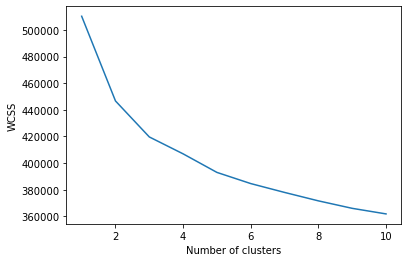

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [40]:
y_kmeans = kmeans.fit_predict(X)

In [41]:
y_kmeans

array([4, 0, 7, ..., 4, 8, 6])

In [44]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [45]:
y_kmeans

array([2, 2, 0, ..., 2, 1, 0])